# Natural Language Processing Project - Seq NLP

## Objective

The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyze the sentiment of the customers.

## Project Description

Generate Word Embedding and retrieve output of each layer with Keras based on Classification task.

Word embedding are a type of word representation that allows words with similar meaning to have similar representation.

It is a distributed representation for the text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We will use the IMDB dataset to learn word embedding as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with a sentiment (positive or negative).

## Dataset

The Dataset of 25,000 movie review from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "**0**" does not stand for a specific word, but instead is used to encode any unknown word.

## Steps and task

### 1. Import test and train data (5 points)

*   Command to import data `from tensorflow.keras.datasets import imdb`
*   Use `imdb.load_data()` method
*   Get train and test set
*   Take 10,000 most frequent words



In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
NUM_OF_WORDS = 10000
INDEX_FROM = 0
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_OF_WORDS, index_from=INDEX_FROM)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
from keras.preprocessing import sequence

Using TensorFlow backend.


In [4]:
MAX_WORDS = 300
X_train = sequence.pad_sequences(X_train, maxlen=MAX_WORDS)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_WORDS)

In [5]:
print("Training data shape ", X_train.shape)
print("Training output data shape ", y_train.shape)
print("_"*100)
print("Testing data shape ", X_test.shape)
print("Testing output data shape ", y_test.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in X_train]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in X_train]))

Training data shape  (25000, 300)
Training output data shape  (25000,)
____________________________________________________________________________________________________
Testing data shape  (25000, 300)
Testing output data shape  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
300


### 2. Import the labels (train and test) (5 points)

In [6]:
word_to_id = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


### 3. Get the word index and then create a key-value pair for word and word_id (15 points)

In [7]:
word_to_id = {k:(v + INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<UNKNOWN>"] = 0

In [8]:
id_to_word = {value:key for key,value in word_to_id.items()}
def get_sentence(index_array):
  return ' '.join(id_to_word[id] for id in index_array)

In [9]:
print(get_sentence(X_train[2]))

<UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> <UNKNOWN> 

In [10]:
print(y_train[2]) # 0: Negative, 1: Positive

0


### 4. Build a Sequential Model using Keras for Sentiment Classification task (15 points)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras import regularizers

In [12]:
model = Sequential()
model.add(Embedding(NUM_OF_WORDS, 32, input_length=MAX_WORDS))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               1920200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 2,240,401
Trainable params: 2,240,401
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
stop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.001, patience=5, min_lr=1e-10, verbose=1, mode="auto")

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5120, verbose=2, callbacks=[reduce_lr, stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
 - 8s - loss: 0.6948 - accuracy: 0.5113 - val_loss: 0.6909 - val_accuracy: 0.5332
Epoch 2/10
 - 7s - loss: 0.6802 - accuracy: 0.5968 - val_loss: 0.6829 - val_accuracy: 0.5599
Epoch 3/10
 - 7s - loss: 0.6501 - accuracy: 0.6734 - val_loss: 0.6485 - val_accuracy: 0.6402
Epoch 4/10
 - 7s - loss: 0.5828 - accuracy: 0.7281 - val_loss: 0.5791 - val_accuracy: 0.7051
Epoch 5/10
 - 7s - loss: 0.4798 - accuracy: 0.7862 - val_loss: 0.4874 - val_accuracy: 0.7728
Epoch 6/10
 - 7s - loss: 0.3592 - accuracy: 0.8560 - val_loss: 0.3986 - val_accuracy: 0.8244
Epoch 7/10
 - 7s - loss: 0.2612 - accuracy: 0.9029 - val_loss: 0.3446 - val_accuracy: 0.8510
Epoch 8/10
 - 7s - loss: 0.2044 - accuracy: 0.9248 - val_loss: 0.3308 - val_accuracy: 0.8584
Epoch 9/10
 - 7s - loss: 0.1604 - accuracy: 0.9435 - val_loss: 0.3205 - val_accuracy: 0.8646
Epoch 10/10
 - 7s - loss: 0.1232 - accuracy: 0.9594 - val_loss: 0.3182 - val_accuracy: 0.8680


### 5. Report the accuracy of the model (5 points)

In [15]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.80%


In [55]:
import re

reviews = []
reviews.append("First things first, grab a couple of tissues before you start watching ‘Dil Bechara’, an adaptation of John Green's novel, The Fault in Our Stars. Without Sushant, this one’s going to be really hard. The movie, as seen from the trailer, opens on this note - “Once upon a time, there was a Prince and a Princess. Both died. End of story.” Well, isn’t this completely contrary to what we’ve been listening to, all this while?")
reviews.append("The film is flooded with songs and unfortunately they are not great fun to watch. Sonam Kapoor’s ‘Rajshri’ girl act fails too.")

data = []
# cleansing
for review in reviews:
  review = review.replace(",", "")
  review = review.replace("‘", "")
  review = review.replace("’", "")
  review = review.replace(".", "")
  review = review.replace('"', '')
  review = review.replace('”', '')
  review = review.replace('“', '')
  review = review.replace("-", "")
  review = review.replace("?", "")
  review = review.replace("!", "")
  review = review.replace("!", "")
  review = re.sub(' +', ' ', review)
  review = review.lower()
  review_ids = []
  for word in review.split():
    if word in word_to_id.keys() and word_to_id[word] < NUM_OF_WORDS:
      review_ids.append(word_to_id[word])
    else:
      review_ids.append(0)
  data.append(review_ids)

# Padding
X_data = sequence.pad_sequences(data, maxlen=MAX_WORDS)

# Predicting
sentiments = model.predict(X_data)

for r, s in zip(reviews, sentiments):
  sentiment = None
  if s[0] > 0.5:
    sentiment = "Positive"
  else:
    sentiment = "Negative"
  print(r)
  print(sentiment)
  print('-'*100)

First things first, grab a couple of tissues before you start watching ‘Dil Bechara’, an adaptation of John Green's novel, The Fault in Our Stars. Without Sushant, this one’s going to be really hard. The movie, as seen from the trailer, opens on this note - “Once upon a time, there was a Prince and a Princess. Both died. End of story.” Well, isn’t this completely contrary to what we’ve been listening to, all this while?
Positive
----------------------------------------------------------------------------------------------------
The film is flooded with songs and unfortunately they are not great fun to watch. Sonam Kapoor’s ‘Rajshri’ girl act fails too.
Negative
----------------------------------------------------------------------------------------------------


In [16]:
history_dict = model.history.history

In [17]:
import matplotlib.pyplot as plt

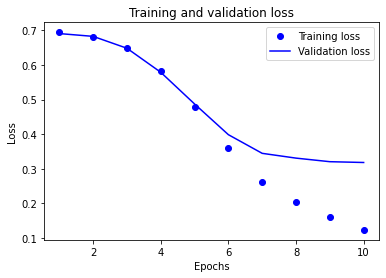

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

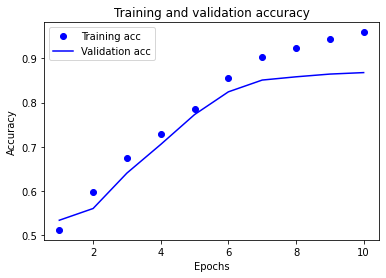

In [19]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 6. Retrieve the output of each layer in Keras for given single test sample from the trained model you built (5 points)

In [20]:
from keras import backend

In [21]:
outputs = [backend.function([model.input], [layer.output])([X_train, 1]) for layer in model.layers]
print(outputs)

[[array([[[-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        [-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        [-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        ...,
        [ 0.04033377,  0.03230646, -0.05055729, ...,  0.01255448,
         -0.05719073, -0.0165011 ],
        [ 0.02505094, -0.02289302, -0.02939019, ...,  0.03457985,
         -0.02352019,  0.02984515],
        [-0.00470379, -0.06706568,  0.03083603, ...,  0.0061283 ,
          0.04100207, -0.0290053 ]],

       [[-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        [-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        [-0.00321532,  0.01983809, -0.00101825, ...,  0.00143346,
         -0.00667386, -0.01447449],
        ...,
        [ 0.01134673,  0.03686079,  0.01704335, ...,